# 02a - Cylinder Segmentation Demo

This notebook demonstrates mesh segmentation using a simple cylinder geometry. The cylinder represents the simplest case with genus = 0 (no holes).

**Part of the GenCoMo Tutorial Series** - [Return to Index](01_tutorial_index.ipynb)

In [5]:
import numpy as np
import trimesh
from gencomo import create_cylinder_mesh, MeshSegmenter, visualize_mesh_3d
from gencomo.mesh.utils import analyze_mesh, print_mesh_analysis

## Create and Visualize Cylinder

In [6]:
# Create a cylinder mesh
cylinder = create_cylinder_mesh(radius=1.0, length=2.0, resolution=20)

print(f"Cylinder properties:")
print(f"  Volume: {cylinder.volume:.3f}")
print(f"  Surface area: {cylinder.area:.3f}")
print(f"  Z-bounds: {cylinder.bounds[:, 2]}")

# Visualize the original cylinder
fig = visualize_mesh_3d(cylinder, title="Original Cylinder", backend="plotly")
fig.show()

Cylinder properties:
  Volume: 6.180
  Surface area: 18.695
  Z-bounds: [-1.  1.]


## Segment the Mesh

In [7]:
# Create segmenter and segment the mesh
segmenter = MeshSegmenter()
segments = segmenter.segment_mesh(cylinder, slice_height=0.5, min_volume=0.1)

print(f"Segmentation complete!")
print(f"Total segments: {len(segments)}")
print(f"Total slices: {len(segmenter.slices)}")

✅ Validated single-hull mesh: 80 external faces, volume=6.180
Computing 3 cross-sections from z=-1.00 to z=1.00
  Cross-section 0: z=-0.50, 40 line segments, area=0.000
  Cross-section 1: z=0.00, 40 line segments, area=0.000
  Cross-section 2: z=0.50, 40 line segments, area=0.000
✅ Computed 3 cross-sections, creating 4 slices

Processing slice 0: z=[-1.00, -0.50]
  🏷️  Annotated 80 external + 38 internal faces
  Slice 0: 1 closed volumes (segments)
    🔄 Transferred face attributes: 118 faces
    Segment seg_0_0: vol=1.545, ext_area=6.219, int_area=3.090

Processing slice 1: z=[-0.50, 0.00]
  🏷️  Annotated 100 external + 96 internal faces
  Slice 1: 1 closed volumes (segments)
    🔄 Transferred face attributes: 196 faces
    Segment seg_1_0: vol=1.545, ext_area=3.129, int_area=6.180

Processing slice 2: z=[0.00, 0.50]
  🏷️  Annotated 100 external + 96 internal faces
  Slice 2: 1 closed volumes (segments)
    🔄 Transferred face attributes: 196 faces
    Segment seg_2_0: vol=1.545, ext_a

In [9]:
segments

[Segment(id='seg_0_0', slice_index=0, segment_index=0, mesh=<trimesh.Trimesh(vertices.shape=(61, 3), faces.shape=(118, 3))>, volume=np.float64(1.5450849718747373), external_surface_area=np.float64(6.21885924455408), internal_surface_area=np.float64(3.0901699437494745), centroid=array([ 4.02512725e-17, -1.50942272e-17, -7.50000000e-01]), z_min=np.float64(-1.0), z_max=np.float64(-0.5)),
 Segment(id='seg_1_0', slice_index=1, segment_index=0, mesh=<trimesh.Trimesh(vertices.shape=(100, 3), faces.shape=(196, 3))>, volume=np.float64(1.545084971874737), external_surface_area=np.float64(3.12868930080462), internal_surface_area=np.float64(6.1803398874989455), centroid=array([ 1.69926524e-17,  1.19263030e-17, -2.50000000e-01]), z_min=np.float64(-0.5), z_max=np.float64(0.0)),
 Segment(id='seg_2_0', slice_index=2, segment_index=0, mesh=<trimesh.Trimesh(vertices.shape=(100, 3), faces.shape=(196, 3))>, volume=np.float64(1.5450849718747373), external_surface_area=np.float64(3.1286893008046213), intern

## SegmentGraph

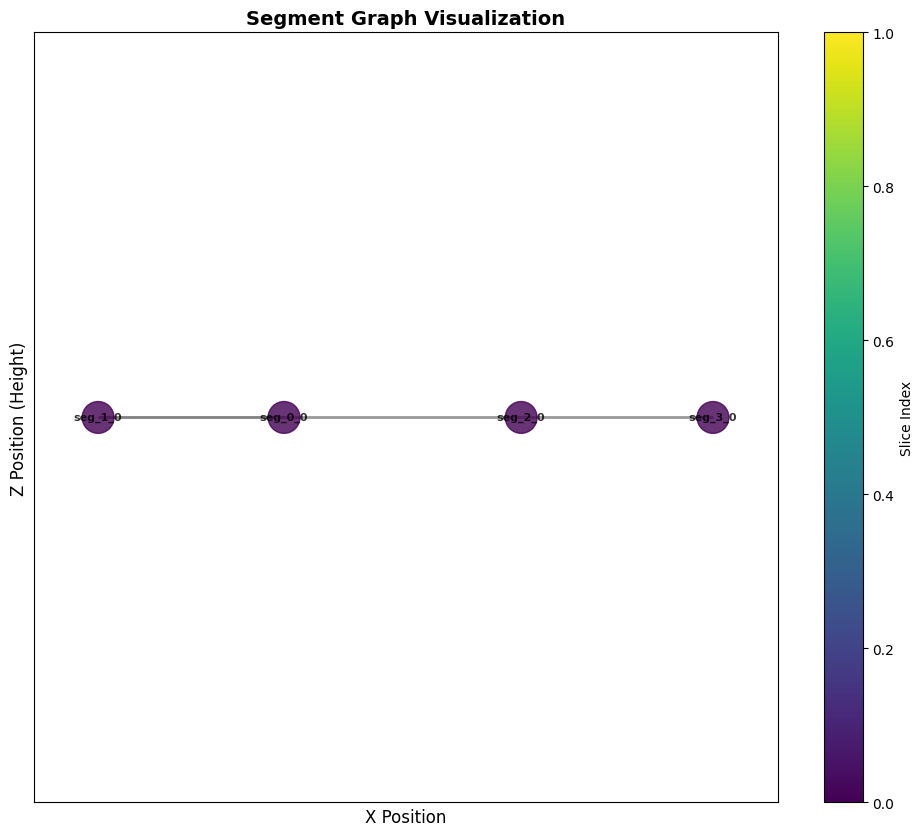

In [8]:
graph = segmenter.get_segment_graph()
_ = graph.visualize()

## Summary

The cylinder segmentation shows:
- **Simple topology**: Each slice typically contains one segment
- **Linear connectivity**: Segments connect in sequence along the z-axis
- **Volume distribution**: End caps may have smaller volumes due to geometry

This represents the baseline case for mesh segmentation with genus = 0 topology.